In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [11]:
# create x and y coordinate points that will make a line that will pass a vertical line test
# create 100 random values between 0 and 10
x = np.random.rand(100)*10

# add random data to data frame for the x values
data = {'x': x}
df = pd.DataFrame(data)

# create a column for the y values all = 0 
df['y'] = 0

# print out the first 5 rows of the data frame to see x, y pairs
print(df.head())

          x  y
0  5.656163  0
1  0.487333  0
2  9.520046  0
3  0.106461  0
4  2.352264  0


In [0]:
# create x and y coordinates for a line that will fail the vertical line test
x2 = [0, 8, 0]
y2 = [-1, 0, 1]

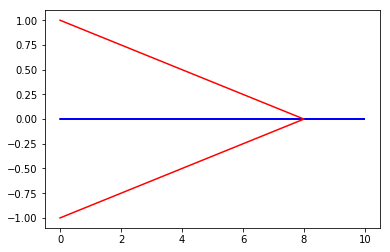

In [17]:
# plot the 2 lines, one passes the vertical line test while one fails the test
plt.plot(df['x'], df['y'], color='b')
plt.plot(x2, y2, color='r')
plt.show();

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function is a relation between a set of inputs (domain) and a set of outputs (range) with the property that each input is related to (mapped to) exactly one output. If the graph fails the vertical line test than the input is related to multiple outputs which violates the property above.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function, the others have multiple inputs (x's) that are related to multiple outputs (y's) so they would fail the vertical line test. 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For function m --> the input (x1, x2, x3) has a dimensionality of 3 and the output has 3 dimension 

For function n --> the input (x1, x2, x3, x4) has a dimensionality of 4 and the output has only 2 dimensions 

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, a simple function that could map from 1 dimension to 2 would be:
f(x) = (x*3, x)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

Transformation matrix for function p:

\begin{align}
\\p (
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} ) = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\begin{align}
\\p (
\begin{bmatrix} 1 \\ 0 \end{bmatrix} ) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
\end{align}
\begin{align}
\\p (
\begin{bmatrix} 0 \\ 1 \end{bmatrix} ) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\\
\end{align}

\begin{align}
T = \begin{bmatrix} 1 & -1 \\ 3 & 2 \end{bmatrix}
\end{align}

Transformation matrix for fuction q:

\begin{align}
\\q (
\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix} ) = x_1\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix}+ x_3\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}
\\
\end{align}

\begin{align}
\\q (
\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} ) = \begin{bmatrix} 4 \\ -1 \\ 5\end{bmatrix}
\\
\end{align}
\begin{align}
\\
q (
\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} ) = \begin{bmatrix} 1 \\ 2 \\ 1\end{bmatrix}
\\
q (
\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} ) = \begin{bmatrix}2 \\ 3 \\ -2 \end{bmatrix}
\\
\end{align}



\begin{align}
T = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1& 2\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [19]:
T = np.array([[1, -1],
              [3, 2]])
p = np.array([[2],
              [4]])
print(T.dot(p))

[[-2]
 [14]]


\begin{align}
\\p (
\begin{bmatrix} 2 \\ 4 \end{bmatrix} ) =
\begin{bmatrix} 14 \\ 6 \end{bmatrix}
\\
\end{align}

\begin{align}
\begin{bmatrix} 1 & -1 \\ 3 & 2 \end{bmatrix}
\begin{bmatrix} 2 \\ 4 \end{bmatrix} = 
\end{align}

\begin{align}
\\q (
\begin{bmatrix} 2 \\ 4 \\ 1\end{bmatrix} ) =
\begin{bmatrix} 14 \\ 9 \\ 12 \end{bmatrix}
\\
\end{align}

\begin{align}
\begin{bmatrix} 1 & -1 \\ 3 & 2 \end{bmatrix}
\begin{bmatrix} 2 \\ 4 \end{bmatrix} = 
\end{align}

In [21]:
T2 = np.array([[4, 1, 2],
               [-1, 2, 3],
               [5, 1, 2]])
q = np.array([[2],
              [4],
              [1]])
print(T2.dot(q))

[[14]
 [ 9]
 [16]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvalues don't chage direction when there is a transformation, it is like the axis at which the transformation moves around.

The eigenvalue is how much teh eigenvector was stretched or squished (scaled) during the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

There are diminishing returns to adding features (dimensions), it is much harder to search and explore when there are more dimensions and it gets more expensive computationally, and as you add more dimensions the data becomes more sparse and measures of distance lose meaning.

Also if there are a low number of observations in relation to the dimensions there is an increased risk of overfitting.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

A good rule of thumb is to have N (rows) be 5 times the size of P (columns) as a minimum. 

If P >= N --> there is an extreme risk of overfitting

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
from sklearn.decomposition import PCA

In [22]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [46]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


In [48]:
print(pca.singular_values_)

[25.08986398  6.00785254]


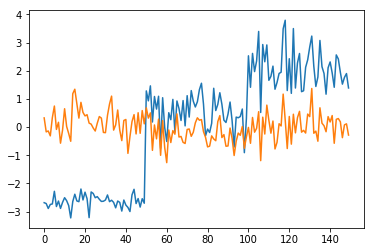

In [55]:
B = pca.transform(x)
plt.plot(B);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)